In [1]:
import numpy as np

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
plt.show()

In [9]:
def plot_dataframe(data: pd.DataFrame, azim=-84, elev=10):
    x0, y0, z0 = data.SX.values, data.SY.values, data.SZ.values
    sx, sy = data.TX.values, data.TY.values

    x1 = x0 + dZ * sx
    y1 = y0 + dZ * sy
    z1 = z0 + dZ
    
    start_points = np.array([z0, y0, x0]).T.reshape(-1, 3)
    end_points = np.array([z1, y1, x1]).T.reshape(-1, 3)

    C = plt.cm.Blues(0.9)
    lc = Line3DCollection(list(zip(start_points, end_points)), colors=C, alpha=0.9, lw=2)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=azim, elev=elev)
    ax.add_collection3d(lc)
    
    ax.set_xlabel("z")
    ax.set_ylabel("y")
    ax.set_zlabel("x") 
    ax.set_xlim(z0.min(), z1.max())
    ax.set_ylim(y0.min(), y1.max())
    ax.set_zlim(x0.min(), x1.max())

In [13]:
df = np.loadtxt('/Users/kaa.kind/Desktop/Курсач/codalab_data/opera_train.data')
df = pd.DataFrame(df, columns=['brick_id', 'SX', 'SY', 'SZ', 'TX', 'TY'])
df_labels = np.loadtxt('/Users/kaa.kind/Desktop/Курсач/codalab_data/opera_train.solution')
df_labels = pd.DataFrame(df_labels, columns=['brick_id', 'shower_id'])

In [11]:
BRICK_X_MIN = 0.
BRICK_X_MAX = 103000.
BRICK_Y_MIN = 0.
BRICK_Y_MAX = 128000.
SAFE_M = 3000.
dZ = 205.
DISTANCE = 1293.

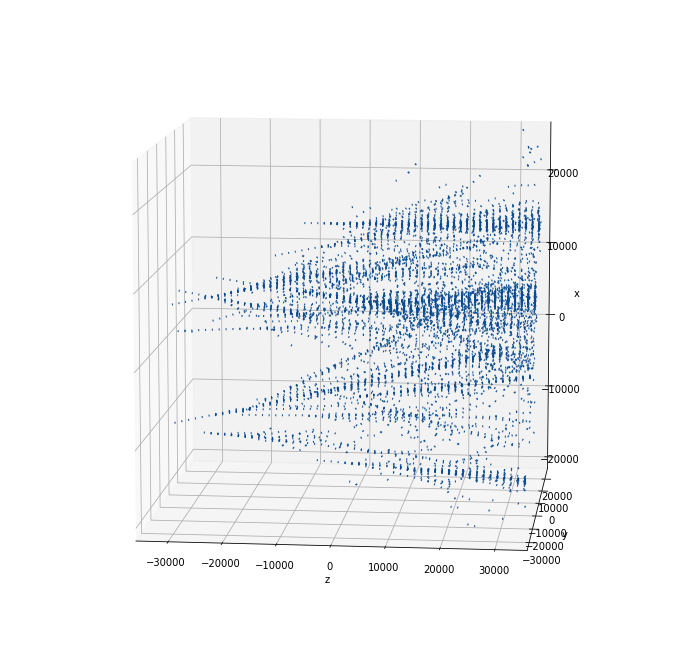

In [15]:
plot_dataframe(df.loc[df.brick_id==7])

In [14]:
df.head()

,brick_id,SX,SY,SZ,TX,TY
0,0.0,-10177.71,-8697.63,-24330.69,-0.1505,0.1620
1,0.0,-10375.19,-8490.78,-23056.31,-0.1585,0.1673
2,0.0,-10591.61,-8268.13,-21785.49,-0.1913,0.1805
3,0.0,-10827.50,-8042.95,-20510.45,-0.1643,0.2017
4,0.0,-11053.21,-7800.50,-19239.20,-0.2127,0.1621


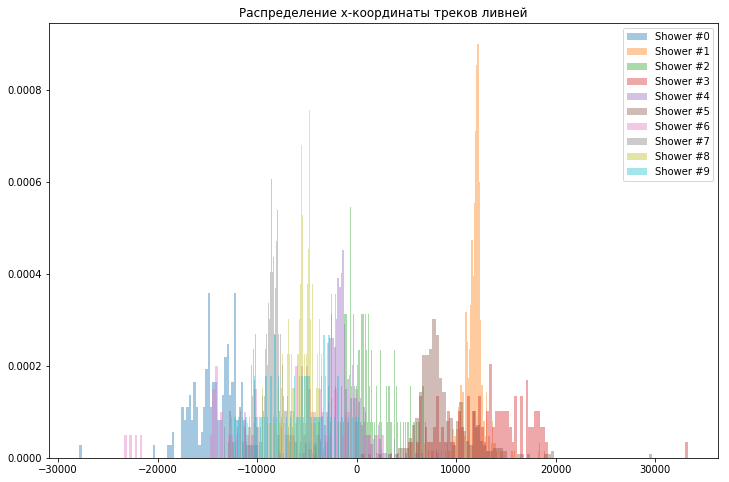

In [19]:
plt.figure(figsize=(12, 8))
plt.title('Распределение x-координаты треков ливней')
for i in range(10):
    plt.hist(df.loc[(df_labels.brick_id==0) & (df_labels.shower_id==i)].SX, 
             density=True, bins=100, label='Shower #{}'.format(i), alpha=0.4)
plt.legend()
plt.show()